<center> <h2> DS 3000 - Spring 2020</h2> </center>
<center> <h3> DS Report </h3> </center>

<center> <h3> Predicting the 2020 March Madness Champions </h3> </center>
<center> <h4> Daniel Chun, Thomas Gross, George Littlefield </h4> </center>

## 1. Introduction

### &emsp; 1.1. Problem Statement


The topic of this project is to declare one team the champions of the 2020 March Madness tournament. Due to COVID-19, the tournament has been cancelled this year, as many other sporting events have been. Because of this, no team has been crowned the national champion for the first time since the tournament’s creation in 1939. We would like to declare a champion given the statistics of the division I teams over the course of the season before it was officially cancelled.

By taking statistics from the 2020 season, as well as statistics from the past five seasons and their respective winners, we can analyze what regular season statistics were the most impactful on the results of the tournament. 

### &emsp; 1.2. Significance of the Problem


It is important to tackle the problem in this project because this season, there is no clear-cut winner of the March Madness tournament as a result of the pandemic. Given the regular season team records and stats, we can determine which team is projected to win the tournament.

The insights from this project can be useful because we can determine which regular season statistics affect a team’s performance in the March Madness tournament and can potentially predict future winners. The bracket games every season are one of the most exciting times for basketball fans, and if the model proves to be effective, it can be used to predict results of individual games as well. 


### &emsp; 1.3. Questions/Hypothesis

**Research Questions**

* Which regular season statistics are more important to a team's progress in the tournament?
* Does defense really win championships? (Are defensive stats more relevant than offensive stats?)
* Can we train a machine learning model to predict the final outcome of every team? In other words, which machine learning algorithm would work best: KNeighborsClassifier, Support Vector Machine, Gaussian Naive Bayes, or Decision Tree


**Hypotheses**

1. Features
    - Null: The outcome of a team playing the tournament and a team's adjusted defensive efficiency stat has no correlation.
    - Alternative: The outcome of a team playing the tournament and a team's adjusted defensive efficiency stat has a correlation. 
    
    
2. Model Selection
    - Null: The Support Vector Machine classifier will yield the best results for the model
    - Alternative: The Support Vector Machine classifier will not yield the best results for the model.


3. Feature Selection
    - Null: Feature selection will lead to higher accuracy of the model
    - Alternative: Feature selection will not lead to higher accuracy of the model 



## 2. METHOD

### 2.1. Data Acquisition


The dataset was found at (https://www.kaggle.com/andrewsundberg/college-basketball-dataset). This was scraped by a user who then added the postseason, seed, and year columns into the dataset. The original source of this data before it was scraped is found at (https://barttorvik.com/trankpre.php). 

The dataset consists of team stats of all the NCAA division I men's basketball teams. There are 23 features (before cleaning), and 1 target which is the postseason column. The postseason column describes the final results of the team in the tournament. The data in this 

**Description of Features**


"\[feature_name\]": \[description\]
- “TEAM”: The NCAA Division I Team
- “CONF”: The athletic conference the team plays in
- “G”: Number of games played
- “W”: Number of games won
- “ADJOE”: Adjusted Offensive Efficiency (points scored per 100 possessions)
- “ADJDE”: Adjusted Defensive Efficiency (points allowed per 100 possessions)
- “BARTHAG”: Power rating (chance of beating a division I team)
- “EFG_O”: Effective field goal percentage shot
- “EFG_D”: Effective field goal percentage allowed
- “TOR”: Turnover percentage allowed (turnover rate)
- “TORD”: Turnover percentage committed (steal rate)
- "ORB": Offensive rebound percentage
- "DRB": Defensive rebound percentage
- "FTR": Ratio of free throws to field goals; how often the team shoots FTs
- "FTRD": Free throw rate allowed
- "2P_O": 2-point shooting percentage 
- "2P_D": 2-point shooting percentage allowed
- "3P_O": 3-point shooting percentage
- "3P_D": 3-point shooting percentage allowed
- "ADJ_T": Adjusted tempo (possessions per 40 minutes)
- "WAB": Wins above bubble (cut off for making the tournament)
- "POSTSEASON": Round where each team was eliminated; Champion = winner
- "SEED": Seed in the tournament
- "YEAR": Season

### 2.2 Variables


**Independent Variables (feature variables)**
- *Number of games played*
- *Number of games won*
- *Adjusted Offensive Efficiency (points scored per 100 possessions)*
- *Adjusted Defensive Efficiency (points allowed per 100 possessions)*
- *Power rating (chance of beating a division I team)*
- *Effective field goal percentage shot*
- *Effective field goal percentage allowed*
- *Turnover percentage allowed (turnover rate)*
- *Turnover percentage committed (steal rate)*
- *Offensive rebound percentage*
- *Defensive rebound percentage*
- *Ratio of free throws to field goals; how often the team shoots FTs*
- *Free throw rate allowed*
- *2-point shooting percentage*
- *2-point shooting percentage allowed*
- *3-point shooting percentage* 
- *3-point shooting percentage allowed*
- *Adjusted tempo (possessions per 40 minutes)*
- *Wins above bubble (cut off for making the tournament)*



**Dependent Variables (target variable)**
* *Round where each team was eliminated*

**Rationale**

The independent variables for the purpose of this project is all of the features listed above, except the team name, the conference the team plays in as they are not numerical variables. The dependent or target variable is the postseason variable, which represents where the team finished in the tournament. 0 refers to the champions, 1 refers to the runner-up, 2 refers to those in the Final Four, 3 refers to those in the Elite Eight, 4 refers to those that made it to the round of 16, 5 represents those up to the round of 32, 6 represents up to the round of 64, 7 represents up to the round of 68 (there are 4 elimination games played. All the teams that do not partake in the tournament have a NA value in the postseason column. 


### 2.3. Data Analysis

**Predictive Model**

We are seeking a single value for the target from 0-7 that represents where the team will finish in the tournament based on the team's overall statistics from the regular season. Given the 20 different feature variables, we will predict a single outcome value that will represent the team's final rank and crown a winner for the 2020 tournament.

**A Supervised Learning Problem**

This is a supervised machine learning problem, utlizing classification algorithms. We will be using the K-Nearest Neighbor, Support Vector Machine, Gaussian Naive Bayes, and Decision Tree classifiers. 

**Rationale**

* K-Nearest Neighbor: The KNN classifier finds the average of the closest k data points to a class grouping of data points. 

* Support Vector Machine: The SVC looks to find a hyperplane that can distinctly classify the data points and maximize the margin between the data points and the hyperplane. 

* Gaussian Naive Bayes: The Naive Bayes classifier assumes that each feature on the datasets hold equal importance. This model may not be as effective because some statistics will have greater importance than others.

* Decision Tree: The decision tree classifier learns a series of if/else questions that ask all of the possible questions to find the one that is most important to the target variable

## 3. RESULTS


###  3.1. Data Wrangling

#####  Import Data

In [1]:
import pandas as pd

url_train = 'https://raw.githubusercontent.com/danielchun321/ds3000project/master/cbb%2015-18.csv'
url_test = 'https://raw.githubusercontent.com/danielchun321/ds3000project/master/cbb19.csv'

train_data = pd.read_csv(url_train)
test_data = pd.read_csv(url_test)

combined_data = train_data.append(test_data)


####   Split testing / training data & Clean Data

In [2]:
train_data = train_data.drop("TEAM", axis = 1)
train_data = train_data.drop("CONF", axis = 1)


test_data = test_data.drop("TEAM", axis = 1)
test_data = test_data.drop("CONF", axis = 1)


combined_data = combined_data.drop("TEAM", axis = 1)
combined_data = combined_data.drop("CONF", axis = 1)


In [3]:
train_data.fillna(8, inplace=True)
test_data.fillna(8, inplace=True)
combined_data.fillna(8, inplace=True)

In [5]:
train_data.head()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,target
0,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,1.0
1,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,1.0
2,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,1.0
3,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,1.0
4,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,18.6,35.8,30.2,39.8,23.9,55.9,46.3,38.7,31.4,66.4,10.7,0.0


####   Extract Feature and Target Vars -*training testing set selection*- (NO test_train_split necessary)

In [4]:
from sklearn.model_selection import train_test_split

X_train = train_data.drop("target", axis = 1)
y_train = train_data["target"]

X_test = test_data.drop("target", axis = 1)
y_test = test_data["target"]

features = combined_data.drop('target', axis = 1)
target = combined_data['target']



####   Preprocessing

In [21]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [6]:
scaler = MinMaxScaler()

def preprocessor(X_train, X_test):
    scaler = MinMaxScaler().fit(X_train)
    
    #scale testing and training sets
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled


In [7]:
X_train_scaled, X_test_scaled = preprocessor(X_train, X_test)

####   Feature Selection

In [8]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVC


def model_based_selection(X_train_scaled, X_test_scaled):
    
    select = SelectFromModel(DecisionTreeRegressor(random_state = 3000), threshold = "median") #Selects top 50% best features
    
    select.fit(X_train, y_train)

    X_train_selected = select.transform(X_train_scaled)
    X_test_selected = select.transform(X_test_scaled)
    
    model = LinearSVC().fit(X = X_train_selected, y = y_train)
    
    print("Selected Features using Model Based Method:")
    column_select = select.get_support(indices = True)
    column_keep = X_train.columns[column_select]
    for ii in column_keep:
        print("\t",ii)
    
    return X_train_selected, X_test_selected
                                   
    

In [9]:
X_train_selected, X_test_selected = model_based_selection(X_train_scaled, X_test_scaled)

Selected Features using Model Based Method:
	 G
	 W
	 BARTHAG
	 EFG_O
	 TORD
	 DRB
	 FTRD
	 3P_O
	 3P_D
	 WAB


###  3.2 Data Exploration

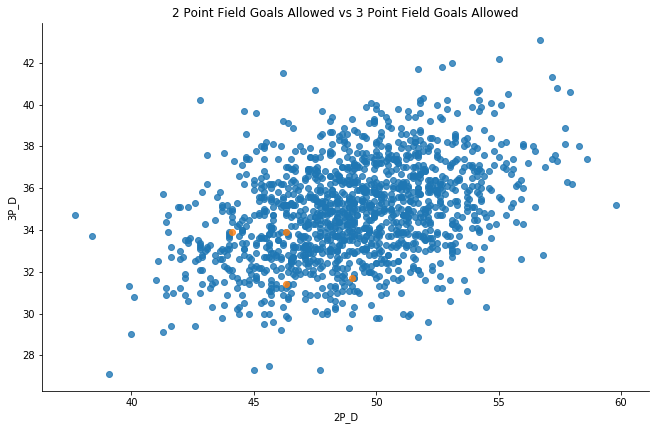

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# set color in new column 'val' , red if the team is a past champion, blue if any other team
train_data["val"] = train_data['target'].apply(lambda x: "red" if x==0 else "blue")
sns.lmplot('2P_D', '3P_D', data = train_data, hue='val', fit_reg=False, legend = False)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('2 Point Field Goals Allowed vs 3 Point Field Goals Allowed')
plt.show()

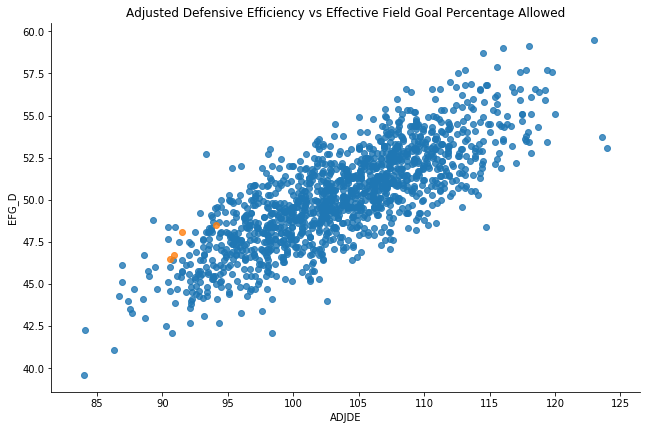

In [11]:
sns.lmplot('ADJDE', 'EFG_D', data = train_data, hue='val', fit_reg=False, legend = False)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Adjusted Defensive Efficiency vs Effective Field Goal Percentage Allowed')
plt.show()

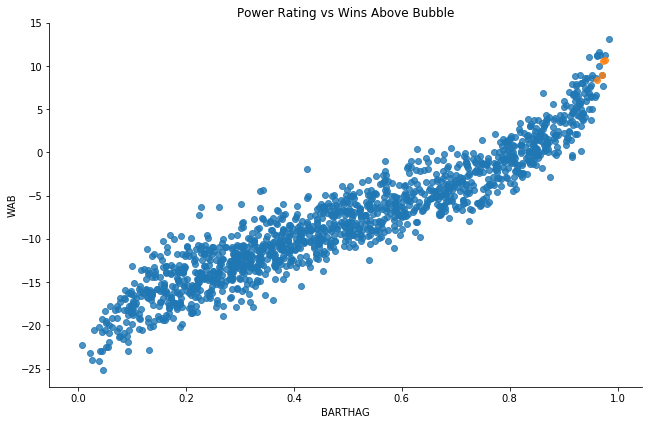

In [12]:
sns.lmplot('BARTHAG', 'WAB', data = train_data, hue='val', fit_reg=False, legend = False)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Power Rating vs Wins Above Bubble')
plt.show()

For all three visualizations, the orange plots represent the champions for the four years in the training set. 

In the first visualization (2 Point Field Goals Allowed vs 3 Point Field Goals Allowed), it is evident that a team's defensive standing has some relevance to winning the championship. Although there are teams that performed better defensively, the past champions were both above average in defensive field goals allowed. 

The second visualization takes a deeper look at the team's defensive stats, comparing the adjusted defensive efficiency and effective field goal percentage allowed. There is a strong correlation with having lower values in these two statistics (less is better for defensive purposes).

The final visualization compares the BARTHAG with the WAB (wins above bubble) stat. The BARTHAG stat is an estimate of a team's chances of winning against another Division 1 team, and the WAB stat takes an average "bubble" team and sees their chances of winning against higher or lower tier teams, based on percentages. It is evident that a high value in these two stats have a strong correlation to performance in the tournament, as it takes a team's ability to beat better teams. 

###  3.3 Model Construction

####   Machine Learning 

In [13]:
estimators = {
        'K-Nearest Neighbor': KNeighborsClassifier(),
        'Support Vector Machine': LinearSVC(max_iter = 1000000),
        'Gaussina Naive Bayes': GaussianNB(),
        'Decision Tree': DecisionTreeClassifier()}

In [14]:
def classifiers_percentage_split_nonscaled():
    print("WITHOUT SCALING")
    print("___________________________________________")
    print("\n")
    #iterates through the dictionary
    for estimator_name, estimator_object in estimators.items():
        
        
        #create the model by fitting the training data
        estimator_object.fit(X=X_train, y=y_train)

        #make predictions on the test set
        predicted = estimator_object.predict(X=X_test)
        
        #computes accuracy of model using percentage-split
        accuracy = estimator_object.score(X_test, y_test)
        #formats the output
        print(estimator_name + ": \n\t" + f'prediction accuracy on the test data accuracy: {accuracy:.2%}' +"\n")
    return "Done"

In [15]:

def classifiers_percentage_split_Scaled():

#Scaled    
    print("WITH SCALING")
    print("___________________________________________")   
    print("\n")
    for estimator_name, estimator_object in estimators.items():
        
        
        #create the model by fitting the training data
        estimator_object.fit(X=X_train_scaled, y=y_train)

        #make predictions on the test set
        predicted = estimator_object.predict(X=X_test_scaled)
        
        #computes accuracy of model using percentage-split
        accuracy = estimator_object.score(X_test_scaled, y_test)
        #formats the output
        print(estimator_name + ": \n\t" + f'prediction accuracy on the test data accuracy: {accuracy:.2%}' +"\n")
    return "Done"
        

In [16]:
def feature_selected():
    
    print("ALL FEATURES USED")
    print("___________________________________________")
    print("\n")    
    for estimator_name, estimator_object in estimators.items():
        
        
        #create the model by fitting the training data
        estimator_object.fit(X=X_train_scaled, y=y_train)

        #make predictions on the test set
        predicted = estimator_object.predict(X=X_test_scaled)
        
        #computes accuracy of model using percentage-split
        accuracy = estimator_object.score(X_test_scaled, y_test)
        #formats the output
        print(estimator_name + ": \n\t" + f'prediction accuracy on the test data accuracy: {accuracy:.2%}' +"\n")
    print("\n")   
    print("___________________________________________")
    X_train_selected, X_test_selected = model_based_selection(X_train_scaled, X_test_scaled)
    print("___________________________________________")
    print("\n")
    for estimator_name, estimator_object in estimators.items():
        
        
        #create the model by fitting the training data
        estimator_object.fit(X=X_train_selected, y=y_train)

        #make predictions on the test set
        predicted = estimator_object.predict(X=X_test_selected)
        
        #computes accuracy of model using percentage-split
        accuracy = estimator_object.score(X_test_selected, y_test)
        #formats the output
        print(estimator_name + ": \n\t" + f'prediction accuracy on the test data accuracy: {accuracy:.2%}' +"\n")
        
    return "Done"
    
    
    

In [17]:
#Cross-Validation Testing

def classifiers_cross_val():
    print("CROSS VAL SCORE")
    print("___________________________________________")
    print("\n")   
    
    for estimator_name, estimator_object in estimators.items():
        kfold = KFold(n_splits=10, random_state=3000, shuffle=True)
    
        scores = cross_val_score(estimator=estimator_object, X=features, y=target, cv=kfold)
    
        print(estimator_name + ": \n\t" + f'mean accuracy={scores.mean():.2%}, ' + f'standard deviation={scores.std():.2%}' +"\n")
        
    return "Done"

In [45]:
classifiers_percentage_split_nonscaled()

WITHOUT SCALING
___________________________________________


K-Nearest Neighbor: 
	prediction accuracy on the test data accuracy: 82.15%

Support Vector Machine: 
	prediction accuracy on the test data accuracy: 82.72%

Gaussina Naive Bayes: 
	prediction accuracy on the test data accuracy: 75.35%

Decision Tree: 
	prediction accuracy on the test data accuracy: 79.60%



C:\Users\georg\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


'Done'

In [24]:
classifiers_percentage_split_Scaled()

WITH SCALING
___________________________________________


K-Nearest Neighbor: 
	prediction accuracy on the test data accuracy: 82.72%

Support Vector Machine: 
	prediction accuracy on the test data accuracy: 81.87%

Gaussina Naive Bayes: 
	prediction accuracy on the test data accuracy: 75.35%

Decision Tree: 
	prediction accuracy on the test data accuracy: 79.89%



'Done'

In [25]:
#scaled yields better results

In [27]:
feature_selected()

ALL FEATURES USED
___________________________________________


K-Nearest Neighbor: 
	prediction accuracy on the test data accuracy: 82.72%

Support Vector Machine: 
	prediction accuracy on the test data accuracy: 81.87%

Gaussina Naive Bayes: 
	prediction accuracy on the test data accuracy: 75.35%

Decision Tree: 
	prediction accuracy on the test data accuracy: 80.74%



___________________________________________
Selected Features using Model Based Method:
	 G
	 W
	 BARTHAG
	 EFG_O
	 TORD
	 DRB
	 FTRD
	 3P_O
	 3P_D
	 WAB
___________________________________________


K-Nearest Neighbor: 
	prediction accuracy on the test data accuracy: 81.02%

Support Vector Machine: 
	prediction accuracy on the test data accuracy: 82.15%

Gaussina Naive Bayes: 
	prediction accuracy on the test data accuracy: 75.35%

Decision Tree: 
	prediction accuracy on the test data accuracy: 77.90%



'Done'

In [ ]:
classifiers_cross_val()

CROSS VAL SCORE
___________________________________________


K-Nearest Neighbor: 
	mean accuracy=82.24%, standard deviation=1.90%



In [22]:
#Confusion Matrix for K-Nearest

#select a classifier
knn = KNeighborsClassifier()

#create the model by fitting the training data
knn.fit(X=X_train, y=y_train)

#make predictions on the test set
predicted = knn.predict(X=X_test)

expected = y_test

#prediction accuracy
accuracy = knn.score(X_test, y_test)

#initiates confusion matrix
confusion = confusion_matrix(y_true=expected, y_pred=predicted)



confusion_df = pd.DataFrame(confusion)
confusion_df

,0,1,2,3,4,5,6,7,8
0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0
3,2,0,0,0,1,1,0,0,0
4,0,0,0,2,2,4,0,0,0
5,0,0,1,1,2,3,6,0,3
6,0,0,0,0,2,5,9,0,16
7,0,0,0,0,0,1,0,0,3
8,0,0,0,0,0,1,9,0,275


In [23]:
class_report = classification_report(y_true=expected, y_pred=predicted)

print(class_report)

              precision    recall  f1-score   support

         0.0       0.33      1.00      0.50         1
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00         4
         4.0       0.25      0.25      0.25         8
         5.0       0.20      0.19      0.19        16
         6.0       0.38      0.28      0.32        32
         7.0       0.00      0.00      0.00         4
         8.0       0.93      0.96      0.95       285

    accuracy                           0.82       353
   macro avg       0.23      0.30      0.25       353
weighted avg       0.80      0.82      0.81       353



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
#select a classifier
clf = LinearSVC(random_state=3000, max_iter=1000000)

#create the model by fitting the training data
clf.fit(X=X_train, y=y_train)


predicted = clf.predict(X=X_test)

expected = y_test

confusion = confusion_matrix(y_true=expected, y_pred=predicted)



confusion_df = pd.DataFrame(confusion)
confusion_df

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,0,1,2,3,4,5,6,7,8
0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0
3,1,0,0,1,0,2,0,0,0
4,2,0,2,0,0,3,1,0,0
5,0,0,1,0,0,1,7,0,7
6,0,0,1,0,0,3,6,0,22
7,0,0,0,0,0,0,0,0,4
8,0,0,0,0,0,1,1,0,283


In [25]:
class_report = classification_report(y_true=expected, y_pred=predicted)

print(class_report)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00         1
         2.0       0.14      0.50      0.22         2
         3.0       1.00      0.25      0.40         4
         4.0       0.00      0.00      0.00         8
         5.0       0.09      0.06      0.07        16
         6.0       0.40      0.19      0.26        32
         7.0       0.00      0.00      0.00         4
         8.0       0.90      0.99      0.94       285

    accuracy                           0.83       353
   macro avg       0.28      0.22      0.21       353
weighted avg       0.78      0.83      0.79       353



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###  3.4 Model Evaluation

**Evaluating The Performance of Algorithms**
        
   The K-Nearest Neighbor and Support Vector Machine models performed the best when measured with a multitude of different metrics. K-Nearest, when measured utilizing a non-scaled percentage split method proved to provide a prediction accuracy of 82.15%. Support Vector on the same unscaled data performed with an accuracy of 82.72% which was the best accuracy of all the algorithms. When using scaled data the K-Nearest algorithm jumped to an accuracy of 82.72% but this saw our second best performing model, the Support Vector, slide down to 81.87%. This unscaled SVM model and the scaled K-Nearest model were our best performing models capping out at the accuracy of 82.72%. In an attempt to find a more accurate model we decided to utilize a feature selection function to apply our most relevant features. This resulted in K-Nearest and SVM coming in as our best performers, however both saw a drop off with their accuracies measuring to 81.02% and 82.15% respectively. 
        
   Finally, we tested these models using a cross validation approach to ensure we were utilizing the most accurate model possible. These test result again provided the K-Nearest and SVM algorithms as the most accurate models with SVM being the most accurate at 82.81% and a standard deviation of 2.13% and K-Nearest resulting in a 82.24% accuracy and a 1.9% standard deviation. 

**Considering Hypotheses**

   1. Features
      * Null: The outcome of a team playing the tournament and a team's adjusted defensive efficiency stat has no correlation.
      * Alternative: The outcome of a team playing the tournament and a team's adjusted defensive efficiency stat does not have a significant correlation.
      * Explanation: Through our data processing and testing we found that we would reject the null hypothesis and that the outcome of a teams playing was no significantly correlated to their adjusted defensive efficiency stat. We uncovered this by applying feature selection on our dataset of all features and found that the adjusted defensive efficiency stat was not in the ten features selected. Resulting in us rejecting the null hypothesis. 
      
    
   2. Model Selection
      * Null: The Support Vector Machine classifier will yield the best results for the model
      * Alternative: The Support Vector Machine classifier will not yield the best results for the model.
      * Explanation: Through our testing utilizing both cross validation testing and percentage split testing we found that we can accept the Null hypothesis with the Support Vector Machine classifier being one of our best performing models with a max accuracy of 82.81% mean accuracy and a standard deviation of 2.13% which was the highest accuracy level out of any classifier. 
    
    
   3. Feature Selection
      * Null: Feature selection will lead to higher accuracy of the model
      * Alternative: Feature selection will not lead to higher accuracy of the model
      * Explanation: Through our testing with the percentage-split method we found that when implementing our model testing using the selected features we only saw an increase in the Support Vector Machines classifier with all other classifiers seeing either no change or lower accuracy. This resulted in us rejecting our null hypothesis as feature selection did not lead to significantly higher accuracy in the model as a whole.


###  3.5 Model Optimization

**Rationale Picking our best models**

We decided on tuning our two best performing models as they performed on average at least 2%, and in some cases up to 5% better 
than the other model tests we ran. Even though KNN does not perform well with several features, we believe this issue was 
met with out feature selection function which mitigated this issue. The KNN model also produces reasonable outputs without a lot of adjustments. SVC was a clear choice for us as it works well with sparse data. Our data had several "8" inputs once we replaced them with NaNs in our data clearing procedure. It was easy to work with, train, and made quick predictions. 

In [26]:
from sklearn.model_selection import GridSearchCV

def model_optimize(X_train, y_train, X_test, y_test):
    print("Model Optimization Resuls")
    print("___________________________________________")
    final_dict = {}
    best_estimators = {'Support Vector Machine': LinearSVC(max_iter = 1000000)}
    param_grid = {"max_iter" : [1000, 10000, 100000, 1000000, 10000000]}
    
    for name, model in best_estimators.items():
        
        grid_search = GridSearchCV(model, param_grid, cv = 5)
        #fit to model/name for each estimator
        grid_search.fit(X = X_train, y = y_train)
        
        print(name)
        print("\tBest Score: ", grid_search.best_score_)
        
        print("\tBest params: ", grid_search.best_params_)
        print()
        final_dict[name] = grid_search.best_params_
    
    final_dict_1 = {}
    best_estimators_1 = {'K-Nearest Neighbor': KNeighborsClassifier()}
    param_grid_1 = {"n_neighbors" : [3, 4, 5, 6, 7]}
    
    for name, model in best_estimators_1.items():
        
        grid_search = GridSearchCV(model, param_grid_1, cv = 5)
        
        grid_search.fit(X = X_train, y = y_train)
        
        print(name)
        print("\tBest Score: ", grid_search.best_score_)
        
        print("\tBest params: ", grid_search.best_params_)
        print()
        final_dict_1[name] = grid_search.best_params_
    
    
    return final_dict, final_dict_1


In [27]:
SVC_optimized = model_optimize(X_train_selected, y_train, X_test_selected, y_test)

Model Optimization Resuls
___________________________________________


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Support Vector Machine
	Best Score:  0.8148144382308085
	Best params:  {'max_iter': 1000}



/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


K-Nearest Neighbor
	Best Score:  0.8283604473817997
	Best params:  {'n_neighbors': 7}



###  3.6 Model Testing

In [28]:
def SVC_optimize():
   
    param_grid = {"max_iter" : [1000, 10000, 100000, 1000000, 10000000]}
    
    grid_search = GridSearchCV(LinearSVC(max_iter = 1000000), param_grid, cv=5)
    
    grid_search.fit(X=X_train_selected, y=y_train)
    #store best param in a variable to be used later
    best_param_SVC = grid_search.best_params_

    #find best paramaters
    print("\tBest parameters: ", grid_search.best_params_)
    print("\tBest Score: ", grid_search.best_score_)
    
    return best_param_SVC

In [29]:
best_param_SVC = SVC_optimize()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


	Best parameters:  {'max_iter': 1000}
	Best Score:  0.8148144382308085


In [30]:
def k_Nearest_optimize():
   
    param_grid = {"n_neighbors" : [3, 4, 5, 6, 7]}
    
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    
    grid_search.fit(X=X_train_selected, y=y_train)
     #store best param in a variable to be used later
    best_param_k_Near = grid_search.best_params_

    #find best paramaters
    print("\tBest parameters: ", grid_search.best_params_)
    print("\tBest Score: ", grid_search.best_score_)
    
    
    return best_param_k_Near

In [31]:
best_param_k_Near = k_Nearest_optimize()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


	Best parameters:  {'n_neighbors': 7}
	Best Score:  0.8283604473817997


In [32]:
def tuned_SVC():
    print("Tuned SVC Accuracy:")
    print(best_param_SVC)
    print("___________________")
    print("\t")
    #setting new model with best param as the new max_iter through saved variable
    svc = LinearSVC(max_iter = best_param_SVC["max_iter"])
    svc.fit(X=X_train_selected,y=y_train)
    predicted = svc.predict(X=X_test_selected)
    accuracy = svc.score(X_test_selected, y_test)
    print("\t"f'Prediction accuracy on the test data accuracy: {accuracy:.2%}')

In [33]:
def tuned_k_Nearest():
    print("Tuned K Nearest Neighbors Accuracy:")
    print(best_param_k_Near)
    print("___________________________________")
    print("\t")
    #setting new model with best param as the new max_iter through saved variable
    knn = KNeighborsClassifier(n_neighbors=best_param_k_Near['n_neighbors'])
    knn.fit(X=X_train_selected,y=y_train)
    predicted = knn.predict(X=X_test_selected)
    accuracy = knn.score(X_test_selected, y_test)
    print("\t"f'Prediction accuracy on the test data accuracy: {accuracy:.2%}')

In [34]:
tuned_SVC()
print("\n")
tuned_k_Nearest()

Tuned SVC Accuracy:
{'max_iter': 1000}
___________________
	
	Prediction accuracy on the test data accuracy: 82.15%


Tuned K Nearest Neighbors Accuracy:
{'n_neighbors': 7}
___________________________________
	
	Prediction accuracy on the test data accuracy: 83.29%


In [35]:
#2020 Prediction

In [36]:
url_2020 = 'https://raw.githubusercontent.com/danielchun321/ds3000project/master/cbb2020_test_data.csv'
X_test_2020 = pd.read_csv(url_2020)

In [37]:
TEAM_2020 = X_test_2020["TEAM"]
X_test_2020 = X_test_2020.drop("TEAM", axis = 1)
X_test_2020 = X_test_2020.drop("CONF", axis = 1)
X_test_2020 = X_test_2020.drop("YEAR", axis = 1)
X_test_2020 = X_test_2020.drop("target", axis = 1)

In [38]:
X_test_2020.head()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
0,30,28,116.1,87.7,0.9616,53.7,43.7,18.7,18.6,32.6,26.4,35.8,23.2,54.9,42.4,34.1,30.5,67.4,10.8
1,30,26,114.5,88.4,0.9513,49.4,45.2,17.8,22.7,35.8,29.8,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5
2,33,31,121.3,94.3,0.9472,57.5,47.6,15.3,18.4,33.6,22.7,38.8,21.8,57.4,47.4,38.6,32.0,72.0,7.7
3,31,29,119.5,93.4,0.9445,59.7,46.6,18.0,18.8,26.4,26.6,33.9,30.9,62.3,45.1,37.1,33.0,67.5,6.8
4,31,22,114.8,91.3,0.9326,52.6,43.3,18.1,15.8,32.8,26.0,30.8,29.3,52.9,43.4,34.8,28.7,69.3,5.2


In [39]:
scaler = MinMaxScaler()

def preprocessor_2020(X_train, X_test_2020):
    scaler = MinMaxScaler().fit(X_train)
    
    #scale testing and training sets
    X_train_scaled = scaler.transform(X_train)
    X_test_2020_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_2020_scaled


In [40]:
X_train_scaled, X_test_2020_scaled = preprocessor_2020(X_train, X_test_2020)

In [41]:
def predict_2020_winner():

    knn = KNeighborsClassifier(n_neighbors=best_param_k_Near['n_neighbors'])
    knn.fit(X=X_train_selected,y=y_train)
    predicted = knn.predict(X=X_test_selected)

    return predicted

In [42]:
predicted = predict_2020_winner()
predicted_df = pd.DataFrame(predicted)
predicted_df = predicted_df.rename(columns = {0:"predicted"})

winner_dict = {0:"Champions", 1:"2ND", 2:"F4", 3:"E8", 4:"S16", 5:"R32", 6:"R64", 7:"R68", 8:"--"}

predicted_df = predicted_df.replace({"predicted": winner_dict})

In [43]:
data1 = TEAM_2020
data2 = X_test_2020
data3 = predicted_df

MarchMadness2020 = pd.concat([data1, data2, data3], axis=1)
MarchMadness2020 = MarchMadness2020.set_index("TEAM")

In [44]:
MarchMadness2020[MarchMadness2020['predicted'] == 'Champions']

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,predicted
TEAM,,,,,,,,,,,,,,,,,,,,
Baylor,30,26,114.5,88.4,0.9513,49.4,45.2,17.8,22.7,35.8,29.8,30.8,30.8,47.5,44.4,35.1,31.1,66.2,8.5,Champions


According to our model, **Baylor** is the 2020 March Madness Champion.

## 4. Discussion

### Summary

To analyze our data, we had a csv file containing team statistics from 2015-2018, and another with the 2019 season stats. The csv file with 4 years of data was converted to a dataframe and used as the training set, whereas the file with the 2019 team stats was used as the testing set. We also combined the two datasets, which was then used to run cross validation testing method. We visualized the data on defensive statistics as well as a team's ability to beat another D1 team, which is tied to one of the original research questions, and concluded that there is a strong correlation between performance in the tournament and the BARTHAG and WAB stats. This is evident from the feature selection test that we conducted, where BARTHAG and WAB were found in the top 50% of important statistics from this dataset. 

### Interpretation of Findings

***Algorithms Compared***

We compared K-Nearest Neighbors, Support Vector Machine, Gaussian Naive Bayes, and the Decision Tree classifiers.



***Algorithms with Best Performance***

The K-Nearest Neighbors and Support Vector Machine algorithms performed best. 

    GridSearchCV
    * KNN: Best Score:  0.8283604473817997
    * SVC: Best Score:  0.8148144382308085
    
    
    Tuned Accuracy
    * KNN: mean accuracy=83.29%
    * SVC: mean accuracy=82.15%

### Original Questions/Hypotheses

**Questions**

- Which regular season statistics are more important to a team's progress in the tournament?

    From the feature selection, the most important stats relevant to a team's progress in the tournament are:

    Selected Features using Model Based Method:
	 - G
	 - W
	 - BARTHAG
	 - EFG_O
	 - TORD
	 - DRB
	 - FTRD
	 - 3P_O
	 - 3P_D
	 - WAB



- Does defense really win championships? (Are defensive stats more relevant than offensive stats?)

    Although defensive stats are important (TORD, DRB, FTRD, 3P_D) as seen above in the feature selection, not every stat from the feature selection was a defensive metric.


- Can we train a machine learning model to predict the final outcome of every team? In other words, which machine learning algorithm would work best: KNeighborsClassifier, Support Vector Machine, Gaussian Naive Bayes, or Decision Tree

    The KNN classifier and the Support Vector Machine classifier worked best. After tuning the results, the KNN classifier had a prediction accuracy of 83.29% and the SVC had a prediction accuracy of 82.15%. 


### Conclusion

The best way to improve the results of this project would be to acquire more data. By having more years of past team data to train the algorithm on, the model will naturally yield improved results as we only used four seasons of data for training. 

Another way to improve this project would be to train individual match results, so that the winner between two teams can be predicted rather than a single team as the champions at the end. This would require many more predictions per data point, as well as the results of each game played in the past, and will potentially lower the accuracy of the model.
